In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task Set A

Plot solution to Diff EQ with and equilibrium solution from earlier. Do solutions confirm our thoughts on equilibrium solutions and stability
- M_0 = 75
- t_0 = 0
- k = 0.25
- 0<=t<=24
- T_0 = 50, 80
- Equilibrium Solution is when T(t) = M_0 = 75

In [2]:
def temp_solution_part_1(T_0, M_0, k, t_int, npts):
    '''
    Function to solve temperature given initial temp, ambient, k and t interval
    
    Params
    ------
    T_0 - int
        initial temperature (F)
    M_0 - int
        ambient temperature (F)
    k - float
        constant of proportionality
    t_int - tuple
        time interval (t_0, t)
    npts - int
        number of points in time interval

    Returns
    -------
    T - list
        solution T(t) at each time step
    t - list
        list of time steps [t_0, t, 1]
    '''

    time_steps = np.linspace(t_int[0], t_int[1], npts)
    T_sol = []
    for t in time_steps:

        T_sol.append(M_0 + ((T_0 - M_0) * np.exp(-1 * k * t)))

    return (time_steps, T_sol)

In [3]:
x1, y1 = temp_solution_part_1(50, 75, .25, (0, 24), 24)
x2, y2 = temp_solution_part_1(80, 75, .25, (0, 24), 24)

In [4]:
len(x1)

24

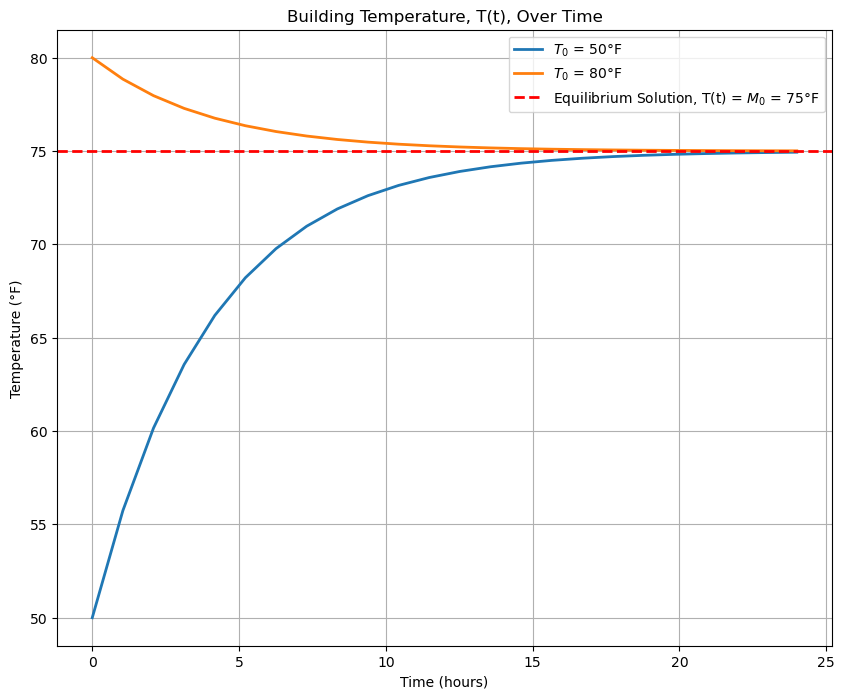

In [5]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x1, y1, label="$T_0$ = 50°F", lw=2)
ax.plot(x2, y2, label="$T_0$ = 80°F", lw=2)
ax.axhline(75, ls='--', color='red', label='Equilibrium Solution, T(t) = $M_0$ = 75°F', lw=2)
ax.set_title("Building Temperature, T(t), Over Time")
ax.set_xlabel("Time (hours)")
ax.set_ylabel("Temperature (°F)")
ax.grid()
ax.legend();

Solutions do confirm answer from part c. Stable equilibrium solution whe T = M_0, solutions tend towards this equilibrium.

#### Question 4f.)

On new plot, plot solutions from previous step with various values of k = [1, .5, .25]

In [6]:
k_vals = [1, .5, .25]
M_0 = 75
T_0 = 50
t_int = (0, 24)
sols = []
for k in k_vals:
    sols.append(temp_solution_part_1(T_0, M_0, k, t_int, 24))

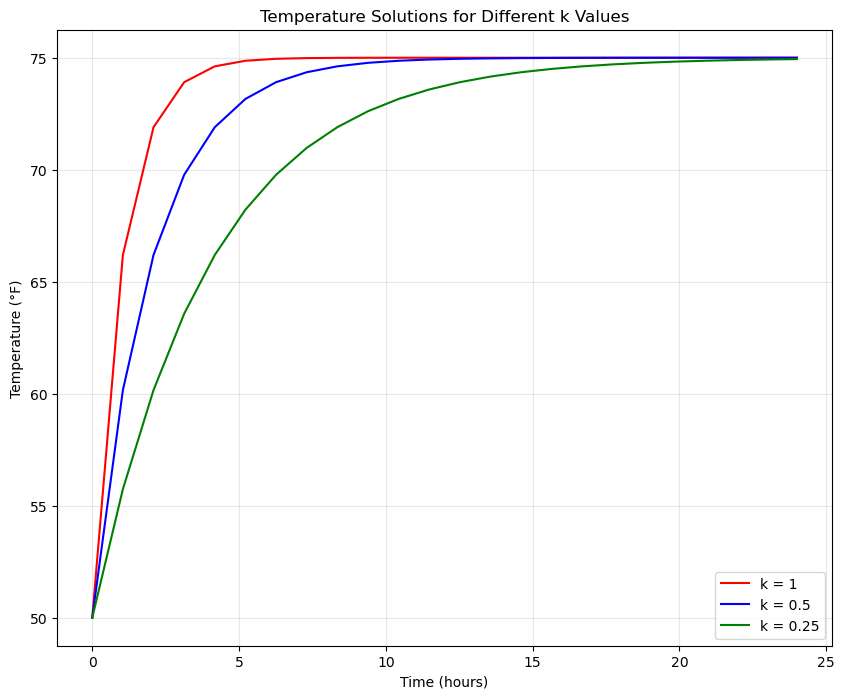

In [7]:
colors = ['red', 'blue', 'green']
fig, ax = plt.subplots(figsize=(10,8))
for sol_idx in list(range(len(sols))):
    ax.plot(sols[sol_idx][0], sols[sol_idx][1], color=colors[sol_idx], label=f'k = {k_vals[sol_idx]}')
ax.legend()
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Temperature (°F)')
ax.set_title('Temperature Solutions for Different k Values')
ax.grid(True, alpha=0.3)
plt.show()

larger k value means we approach equilibrium solution more quickly.

What physical values (properties of building) could lead to this?

Fourth Order Runge Katta Method to approximate solution

In [8]:
def f(t, y, M_0, k):
    return k * (M_0 - y)

In [11]:
t, y = rk4(0, 24, 240, 50, f, k=.25, M_0=75)

In [12]:
t2, w2 = temp_solution_part_1(50, 75, .25, (0, 24), 24)

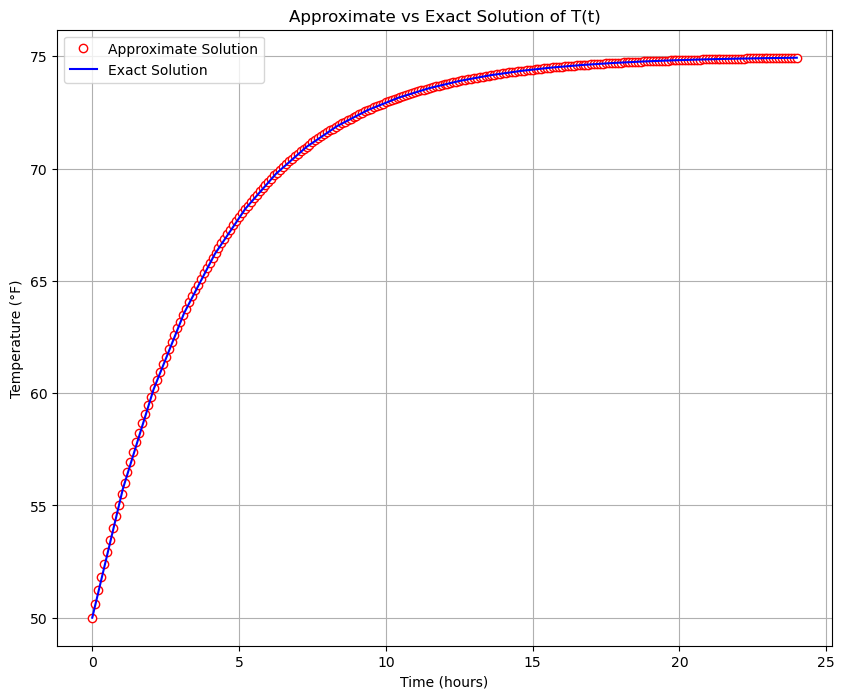

In [13]:
plt.figure(figsize=(10,8))
plt.plot(t, y,  'o', mec='red', mfc='white', label='Approximate Solution')
plt.plot(t2, w2, color='blue', label='Exact Solution')
plt.title("Approximate vs Exact Solution of T(t)")
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend();

#### Question 5.)

Graph error of numerical approximation.

In [14]:
t, y_true = temp_solution_part_1(50, 75, .25, (0, 24), 241)

Plot absolute value of difference between estimate and exact

In [15]:
error = np.abs(np.array(y_true)-np.array(y))

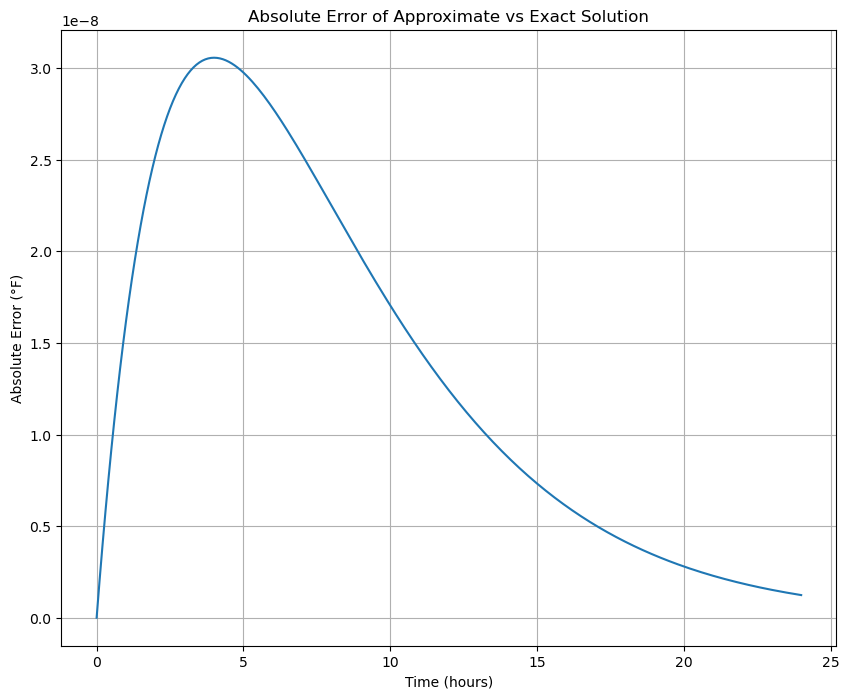

In [16]:
plt.figure(figsize=(10,8))
plt.plot(t, error)
plt.title('Absolute Error of Approximate vs Exact Solution')
plt.xlabel('Time (hours)')
plt.ylabel('Absolute Error (°F)')
plt.grid();

## Task Set C - Refining Model

In [17]:
def M_t(M_0, t):
    '''
    Calculates ambient temperature outside of building at time t

    Parameters
    ----------
    M_0 - int
        initial ambient temperature
    t - float
        time step
    
    Returns
    -------
    M(t) - float
        ambient temperature at time t
    '''
    return M_0 - 12 * np.cos(np.pi*(t-5)/12)

In [18]:
def A_t(t, y, k=.25, M_0=75):
    '''
    Models effect of ambient temperature, M(t), on rate of change of temperature
    Used in 4th order Runge Kutta function and set up accordingly

    Parameters
    ----------
    t - float
        time step
    y - float
        building temperature at time t
    k - float
        constant of proportionality
    M_0 - int
        initial ambient temperature
    
    Returns
    -------
    float
        rate of change of temperature at time t due to ambient temperature M(t)
    '''
    return k * (M_t(M_0, t) - y)

Below I define fourth order runge kutta algorithm. I include `**kwargs` parameter so it can be used for functions with different paraemters than A(t) in later task sets 

In [19]:
def rk4(ti, tf, npts, y0, f, **kwargs):
    '''
    Execute fourth order runge kutta approximation for 
    differentieal equation dT/dt = f(t, y) 
    
    Parameters
    ----------
    ti - int
        initial time
    tf - int
        end time
    npts - int
        number of steps
    y0 - int
        initial value of dependent variable
    f - function
        DE to approximate solution for
    **kwargs - dict, optional
        additional keyword arguments passed to f

    Returns
    -------
    tuple
        (time values from ti to tf, solution values over time interval)
    '''

    h = (tf-ti)/npts
    t = np.linspace(ti, tf, npts+1)
    y = np.zeros(npts+1)
    y[0] = y0

    for i in list(range(npts)):
        k1 = f(t[i], y[i], **kwargs)
        k2 = f(t[i] + h/2, y[i] + h*k1/2, **kwargs)
        k3 = f(t[i] + h/2, y[i] + h*k2/2, **kwargs)
        k4 = f(t[i] + h, y[i] + h*k3, **kwargs)
        y[i+1] = y[i] + h*(k1 + 2*k2 + 2*k3 + k4)/6.0

    return (t, y)

Execute fourth order runge kutta for refined ambient temperature model, A(t).

**NOTE**: Confirm with professor or TA A(t) function. Task set C had 12*cos... but later task sets had 10\*cos... so I used that.

In [20]:
t, y = rk4(0, 24, 240, 65, A_t)

Also want to include ambient temperature M(t) on graph with solution, calculate for each time step when M_0 = 75

In [21]:
m = [M_t(75, t_step) for t_step in t]

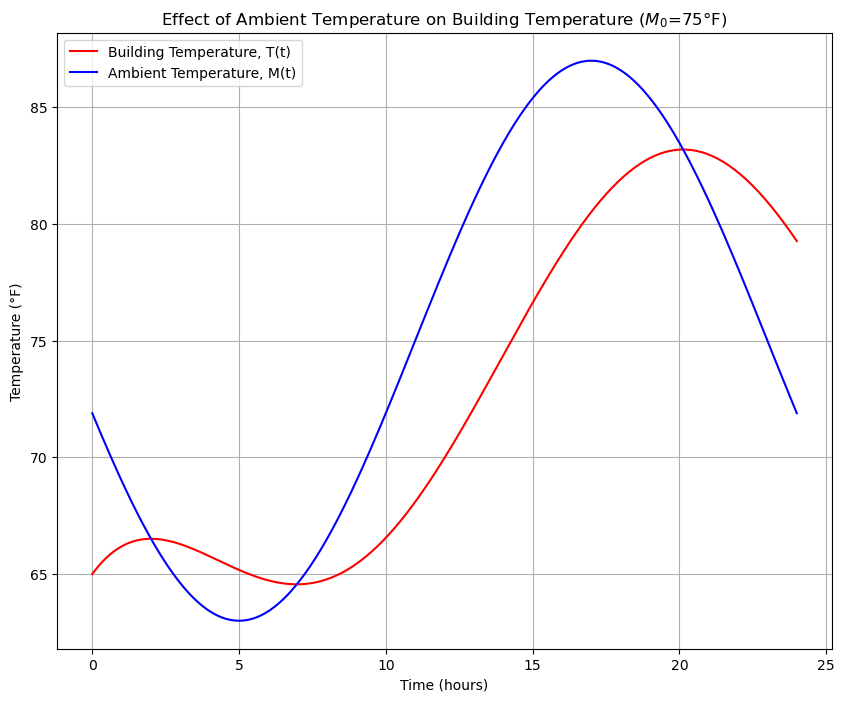

In [22]:
plt.figure(figsize=(10,8))
plt.plot(t, y, color='red', label='Building Temperature, T(t)')
plt.plot(t, m, color='blue', label='Ambient Temperature, M(t)')
plt.title('Effect of Ambient Temperature on Building Temperature ($M_0$=75°F)')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend();

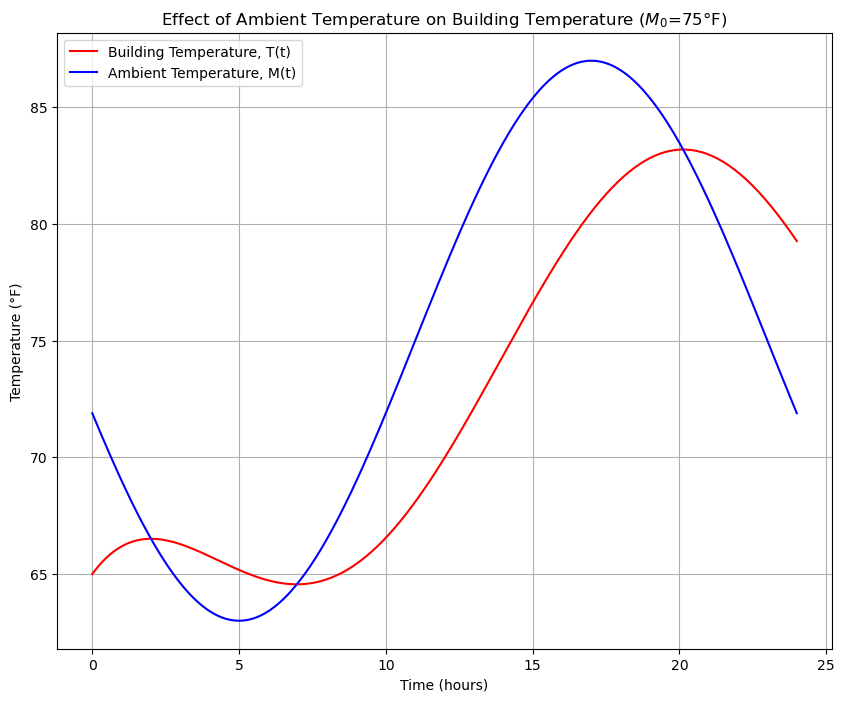

In [23]:
plt.figure(figsize=(10,8))
plt.plot(t, y, color='red', label='Building Temperature, T(t)')
plt.plot(t, m, color='blue', label='Ambient Temperature, M(t)')
plt.title('Effect of Ambient Temperature on Building Temperature ($M_0$=75°F)')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend();

Building temp rises to meet ambient temp and then follows same fluctuations

In [24]:
def hours_to_hm(t_hours):
    total_minutes = int(round(float(t_hours) * 60.0))
    hour = total_minutes // 60
    minute = total_minutes % 60
    return (hour, minute)

In [25]:
def min_and_max(time, soln):
    '''
    Accepts time interval and solution array and returns the minimum and maximum
    values of solution and at what times they occurred in hours and minutes
    '''

    # Find indices of min and max
    max_idx = np.argmax(soln)
    min_idx = np.argmin(soln)

    # Get values from soln and time
    max_value = soln[max_idx]
    min_value = soln[min_idx]
    max_time = time[max_idx]
    min_time = time[min_idx]

    hm_max = hours_to_hm(max_time)
    hm_min = hours_to_hm(min_time)

    return {
        'max': (max_value, hm_max),
        'min': (min_value, hm_min)
    }

Find minimum and maximum building and ambient temperature

In [26]:
# Min and max building temp
min_and_max(t, y)

{'max': (np.float64(83.19338628954775), (20, 6)),
 'min': (np.float64(64.5601332307259), (7, 0))}

In [27]:
# Min and max ambient temp
min_and_max(t, m)

{'max': (np.float64(87.0), (17, 0)), 'min': (np.float64(63.0), (5, 0))}

Repeat entire process when M_0 = 25

In [28]:
t, y2 = rk4(0, 24, 240, 65, A_t, M_0=35)
m2 = [M_t(35, t_step) for t_step in t]

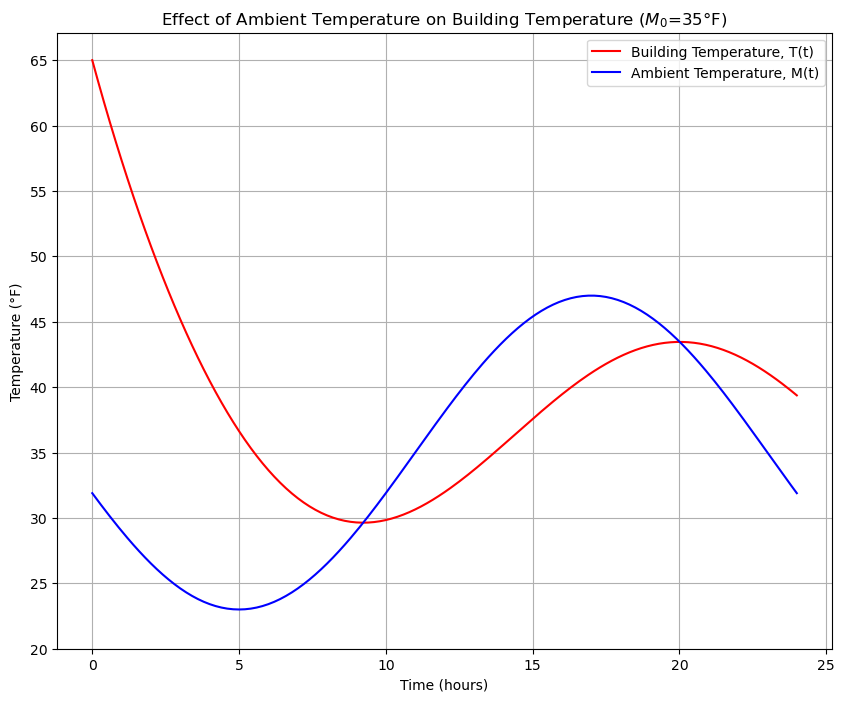

In [29]:
plt.figure(figsize=(10,8))
plt.plot(t, y2, color='red', label='Building Temperature, T(t)')
plt.plot(t, m2, color='blue', label='Ambient Temperature, M(t)')
plt.title('Effect of Ambient Temperature on Building Temperature ($M_0$=35°F)')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.yticks(np.arange(20, 70, 5))
plt.grid()
plt.legend();

Again, building temp falls to coincide with ambient temperature and then follows same fluctuation patterns

In [30]:
# Min and max building temp
min_and_max(t, y2)

{'max': (np.float64(65.0), (0, 0)),
 'min': (np.float64(29.637075955241315), (9, 12))}

In [31]:
# Min and max ambient temp
min_and_max(t, m2)

{'max': (np.float64(47.0), (17, 0)), 'min': (np.float64(23.0), (5, 0))}

## Task Set D

In [32]:
def H_t(t, y):
    '''
    Models effect of people, lights, and machinery on rate of change of building temperature

    Parameters
    ----------
    t - float
        time step
    y - float

    Returns
    -------
    float
        rate of change in temperature due to H(t)
    '''
    return 7*(1.0/np.cosh(.75*(t-10)))

In [33]:
t, y = rk4(0, 24, 240, 65, H_t)

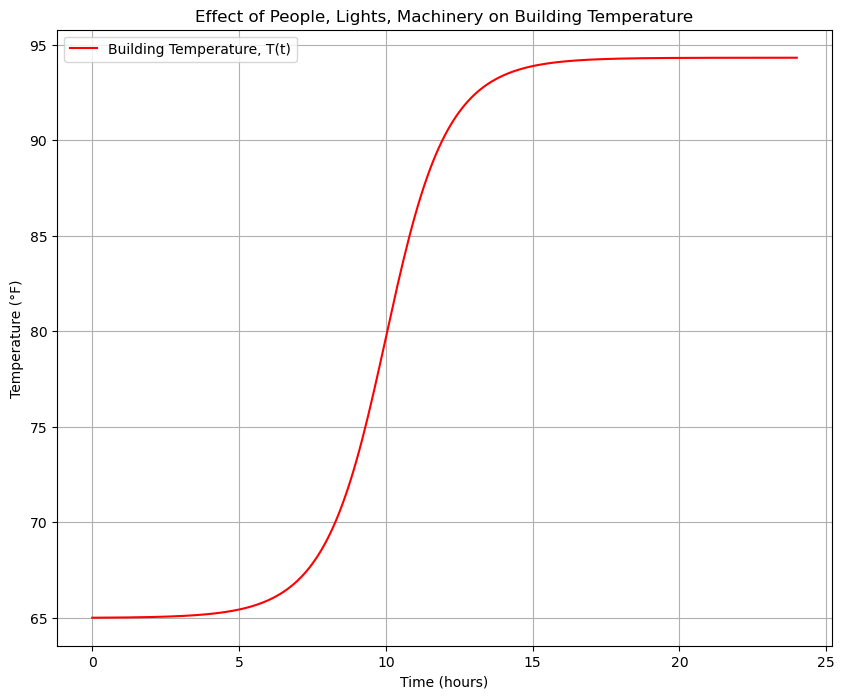

In [34]:
plt.figure(figsize=(10,8))
plt.plot(t, y, color='red', label='Building Temperature, T(t)')
plt.title('Effect of People, Lights, Machinery on Building Temperature')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend();

In [35]:
min_and_max(t, y)

{'max': (np.float64(94.3106931791412), (24, 0)),
 'min': (np.float64(65.0), (0, 0))}

H(t) is the effect of people, lights, machinery, etc on the temperature of the building. I imagine people start coming into building in the morning, turning lights on, using equipment, etc. and do so for the duration of the day. It makes sense that the temperature would start at it's minimum and rise quickly during the period of the work day.

## Task Set E

Look purely at effect of furnaces and AC

In [36]:
def Q_t(t, y, T_d, k_d):
    '''
    Models effect of furnaces and AC on rate of change of building temp

    Parameters
    ----------
    t - float
        time step
    y - float
        building temp at time t
    T_d - int
        thermostat temperature in building
    k_d - float
        constant of proportionality
    
    Returns
    -------
    float
        rate of change of building temp due to Q(t)
    '''
    return k_d * (T_d - y)

Solve DE four times using Td = 77 and the following values
1. T_0 = 65, k_d = 0.2
2. T_0 = 65, k_d = 2.0
3. T_0 = 95, k_d = 0.2
4. T_0 = 95, k_d = 2.0

In [37]:
t1, y1 = rk4(0, 24, 240, 65, Q_t, T_d=77, k_d=0.2)
t2, y2 = rk4(0, 24, 240, 65, Q_t, T_d=77, k_d=2.0)
t3, y3 = rk4(0, 24, 240, 95, Q_t, T_d=77, k_d=0.2)
t4, y4 = rk4(0, 24, 240, 95, Q_t, T_d=77, k_d=2.0)

In [38]:
y_list = [y1, y2, y3, y4]
colors = ['red', 'blue', 'green', 'orange']
labels = [f'Building Temperature, T(t), $T_d$=77, $k_d$={kd}' for kd in [0.2, 2.0, 0.2, 2.0]]

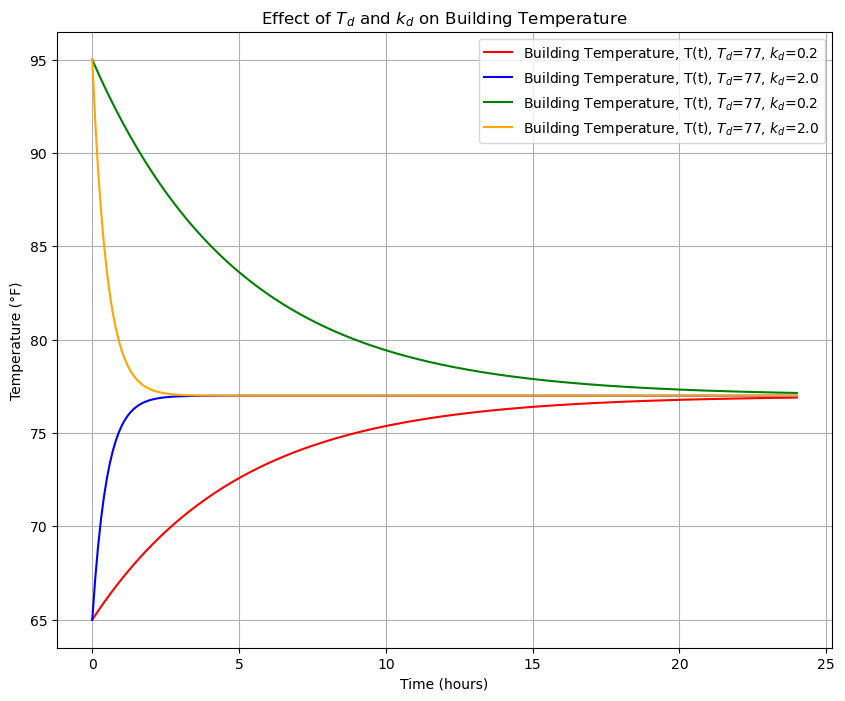

In [39]:
plt.figure(figsize=(10,8))
for i in range(len(y_list)):
    plt.plot(t, y_list[i], color=colors[i], label=labels[i])
plt.title('Effect of $T_d$ and $k_d$ on Building Temperature')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend();

Possible physical explanation of k_d. T_d is temperature thermostat is set at (77 degrees). A larger k_d results in building reaching that temperature faster. It could be quality of equipment. How efficient furnace or AC is. Dive into this more.

### Task Set F

Combining all factors that effect temperature of building. Below I create a function combining all components of complete temperature model together. A particular componenet of model (A(t), H(t), Q(t)) will only be included if parameter is "enabled" by rk4 function.

In [40]:
def temperature_model(t, y, **kwargs):
    '''
    Complete temperature model with option to include any of three independent
    components A(t), H(t), Q(t)

    **kwargs flag "enable_A_t" will include A(t), same for other functions
    '''
    total_change = 0

    if kwargs.get('enable_A_t_SetF', False):
        k = kwargs.get('k', .25)
        M_0 = kwargs.get('M_0', 75)
        total_change += A_t(t, y, k, M_0)

    if kwargs.get('enable_H_t', False):
        total_change += H_t(t, y)

    if kwargs.get('enable_Q_t', False):
        T_d = kwargs.get('T_d', 77)
        k_d = kwargs.get('k_d', 2.0)
        total_change += Q_t(t, y, T_d, k_d)

    return total_change

Ambient temp function for Task Set F

In [41]:
def M_t_SetF(M_0, t):
    '''
    Calculates ambient temperature outside of building at time t

    Parameters
    ----------
    M_0 - int
        initial ambient temperature
    t - float
        time step
    
    Returns
    -------
    M(t) - float
        ambient temperature at time t
    '''
    return M_0 - 10 * np.cos(np.pi*(t-5)/12)

In [42]:
def A_t_SetF(t, y, k=.25, M_0=75):
    '''
    Models effect of ambient temperature, M(t), on rate of change of temperature
    Used in 4th order Runge Kutta function and set up accordingly

    Parameters
    ----------
    t - float
        time step
    y - float
        building temperature at time t
    k - float
        constant of proportionality
    M_0 - int
        initial ambient temperature
    
    Returns
    -------
    float
        rate of change of temperature at time t due to ambient temperature M(t)
    '''
    return k * (M_t_SetF(M_0, t) - y)

#### Part 1

Include:
- H(t)
- Q(t)
    - T_d = 77
    - k_d = 2.0
- T_0 = 75

In [43]:
t, y = rk4(0, 24, 240, 75, temperature_model, enable_H_t=True, enable_Q_t=True, T_d=77, k_d=2.0)

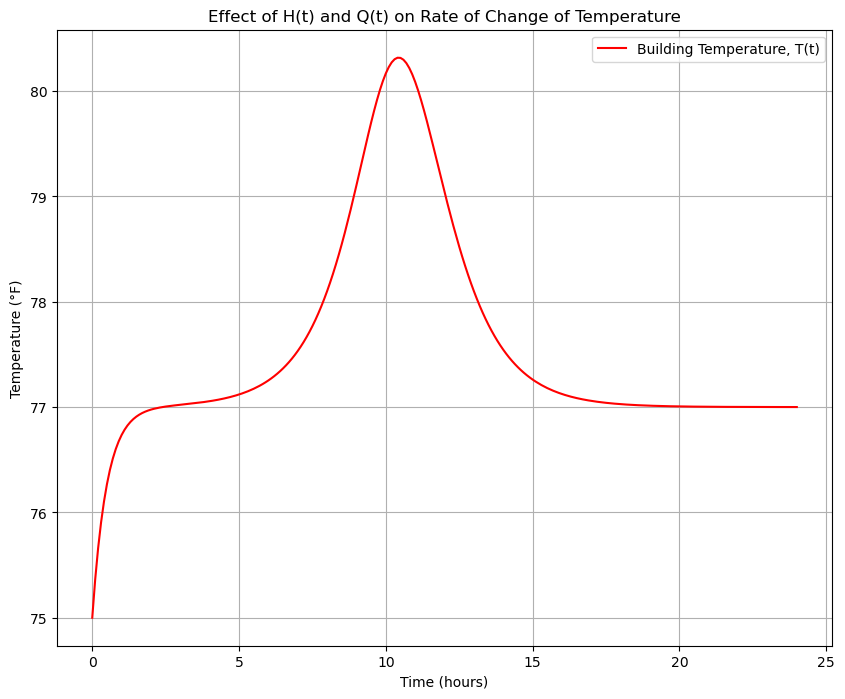

In [44]:
plt.figure(figsize=(10,8))
plt.plot(t, y, color='red', label='Building Temperature, T(t)')
plt.title('Effect of H(t) and Q(t) on Rate of Change of Temperature')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend();

In [45]:
min_and_max(t, y)

{'max': (np.float64(80.31691464278505), (10, 24)),
 'min': (np.float64(75.0), (0, 0))}

Equipment damage occurs if temperature of building exceeds 81 degrees F. Air conditioning is able to prevent equipment damage and maintain a nearly constant temperature right around 77 degrees (find exact)

In [46]:
y[230:]

array([77.0006529 , 77.00060573, 77.00056196, 77.00052135, 77.00048368,
       77.00044873, 77.00041631, 77.00038623, 77.00035832, 77.00033243,
       77.00030841])

#### Part 2

Hot weekend. No people in building. Furnace and AC is off. H(t) = Q(t) = 0

Include:
- A(t)
    - k = 0.25
    - M_0 = 85
    
T_0 = 75

In [52]:
t, y = rk4(0, 24, 240, 75, temperature_model, enable_A_t_SetF=True, k=0.25, M_0=85)

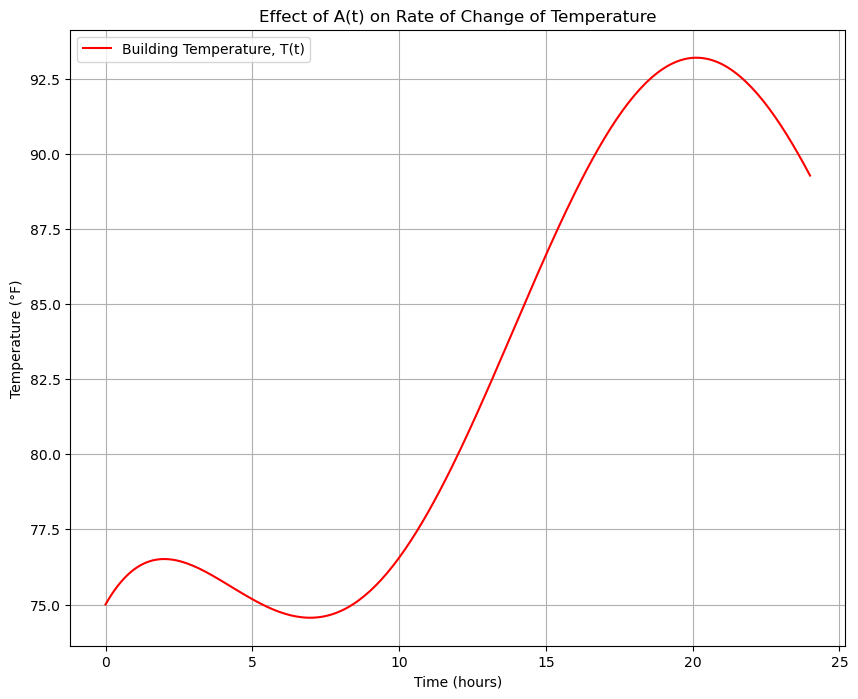

In [53]:
plt.figure(figsize=(10,8))
plt.plot(t, y, color='red', label='Building Temperature, T(t)')
plt.title('Effect of A(t) on Rate of Change of Temperature')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend();

Equipment will be damaged. We exceed 81 degrees about 12 hours in (FIND EXACT TIME)

In [51]:
min_and_max(t, y)

{'max': (np.float64(75.0), (0, 0)), 'min': (np.float64(75.0), (0, 0))}

#### Part 3

Same scenario as part 2 but include AC.

Include
- A(t)
    - k = 0.25
    - M_0 = 85
- Q(t)
    - T_d = 77
    - k_d = 2, 0.5
    
T_0 = 75

In [54]:
t, y = rk4(0, 24, 240, 75, temperature_model, enable_A_t_SetF=True, enable_Q_t = True, k=0.25, M_0=85, k_d=2, T_d=77)

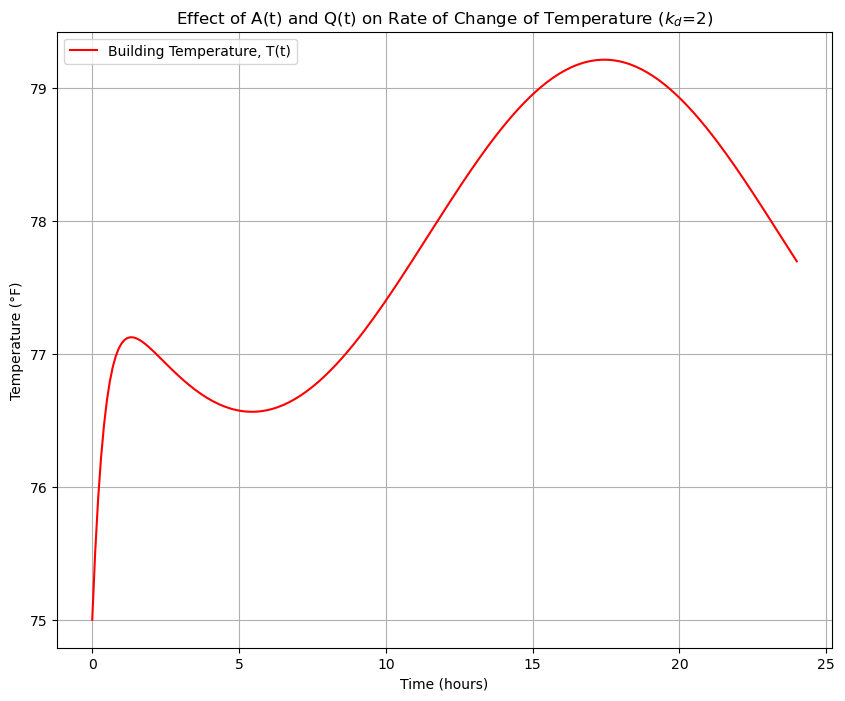

In [55]:
plt.figure(figsize=(10,8))
plt.plot(t, y, color='red', label='Building Temperature, T(t)')
plt.title('Effect of A(t) and Q(t) on Rate of Change of Temperature ($k_d$=2)')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend();

In [56]:
t, y = rk4(0, 24, 240, 75, temperature_model, enable_A_t_SetF=True, enable_Q_t = True, k=0.25, M_0=85, k_d=0.5, T_d=77)

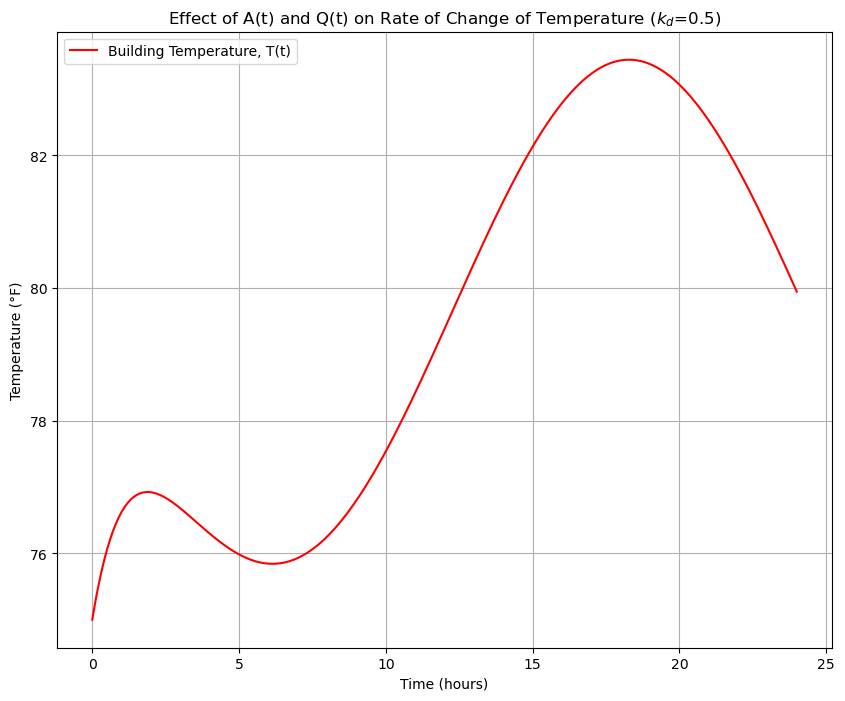

In [57]:
plt.figure(figsize=(10,8))
plt.plot(t, y, color='red', label='Building Temperature, T(t)')
plt.title('Effect of A(t) and Q(t) on Rate of Change of Temperature ($k_d$=0.5)')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend();

#### Part 4

Include:
- A(t)
    - M_0 = 85
    - k = 0.25
- H(t)
- Q(t)
    - T_d = 77
    - k_d = 2.0

T_0 = 75

In [58]:
t, y = rk4(0, 72, 720, 75, temperature_model, enable_A_t_SetF=True, enable_H_t=True, enable_Q_t=True, M_0=85, k=0.25, T_d=77, k_d=2)

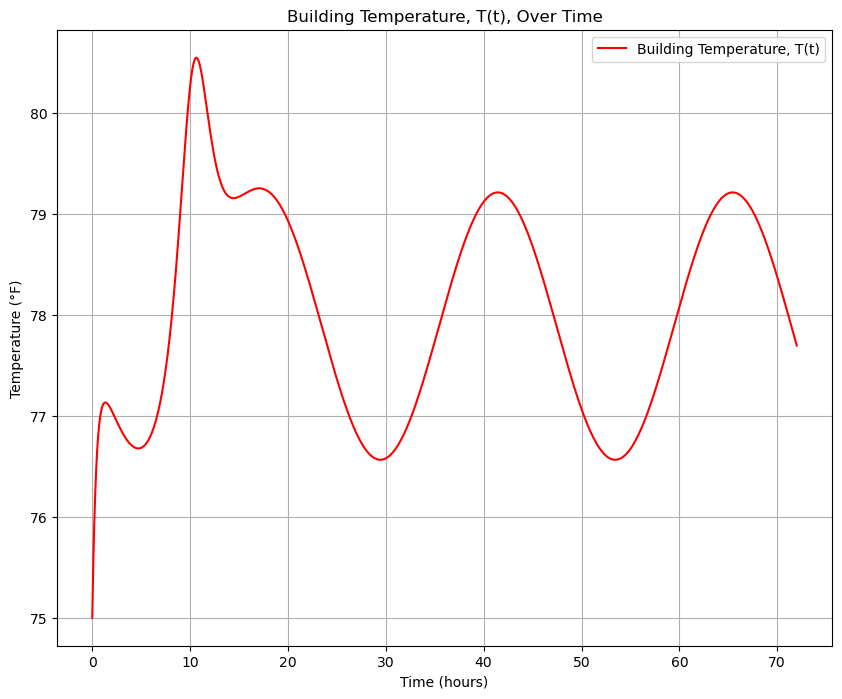

In [59]:
plt.figure(figsize=(10,8))
plt.plot(t, y, color='red', label='Building Temperature, T(t)')
plt.title('Building Temperature, T(t), Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend();

In [60]:
m = [M_t_SetF(85, t_step) for t_step in t]

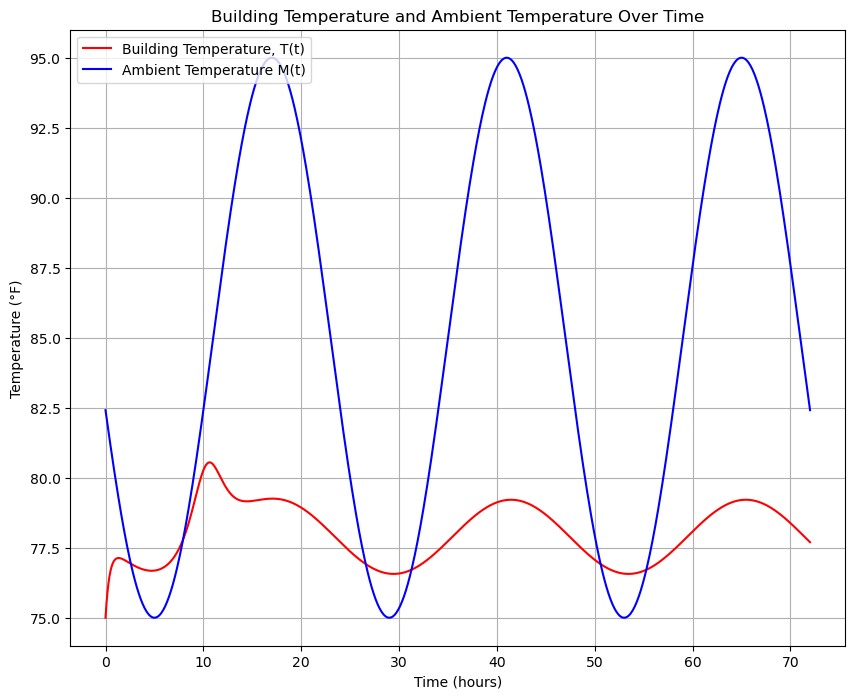

In [61]:
plt.figure(figsize=(10,8))
plt.plot(t, y, color='red', label='Building Temperature, T(t)')
plt.plot(t, m, color='blue', label='Ambient Temperature M(t)')
plt.title('Building Temperature and Ambient Temperature Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°F)')
plt.grid()
plt.legend(loc=2);